[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/andreofner/pyGPC/blob/master/demo.ipynb)


In [ ]:
!git clone https://github.com/andreofner/pyGPC

Cloning into 'pyGPC'...
remote: Enumerating objects: 625, done.
remote: Counting objects: 100% (553/553), done.
remote: Compressing objects: 100% (541/541), done.
remote: Total 625 (delta 234), reused 32 (delta 10), pack-reused 72
Receiving objects: 100% (625/625), 25.05 MiB | 12.58 MiB/s, done.
Resolving deltas: 100% (259/259), done.


In [ ]:
cd pyGPC

/content/pyGPC/pyGPC


In [ ]:
# Train a static predictive coding model and classify MNIST digits
# Note that in all examples we train only on a couple of batches or even a single batch, 
# i.e. far from the amounts of data used for conventional deep learning
# Depending on the number of layers and precision settings, we'll get different results. 
# Changing other hyper parameters has less pronounced effects

%%capture
%matplotlib inline


Layers: [Sequential(
  (0): Identity()
  (1): Linear(in_features=512, out_features=784, bias=False)
  (2): Dropout(p=0.0, inplace=False)
), Sequential(
  (0): Identity()
  (1): Linear(in_features=20, out_features=256, bias=False)
  (2): Dropout(p=0.0, inplace=False)
)]
Cause states : [[64, 1, 784], [64, 1, 256], [64, 1, 10]]
Hidden states: [[64, 1, 784], [64, 1, 256], [64, 1, 10]]
Covariance learning: [[1], [1], [1]]
Covariance inference: [[1], [1], [1]]
Learning rates: [[0.01, 0, 1e-05, 0.1, 0], [0, 0.01, 1e-05, 0.1, 0]]
1 | 10 	 Update 100 | 100
2 | 10 	 Update 100 | 100
3 | 10 	 Update 100 | 100
4 | 10 	 Update 100 | 100
5 | 10 	 Update 100 | 100
6 | 10 	 Update 100 | 100
7 | 10 	 Update 100 | 100
8 | 10 	 Update 100 | 100
9 | 10 	 Update 100 | 100
10 | 10 	 Update 100 | 100


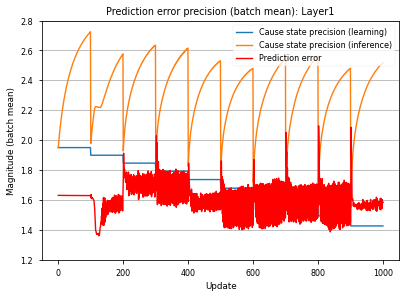

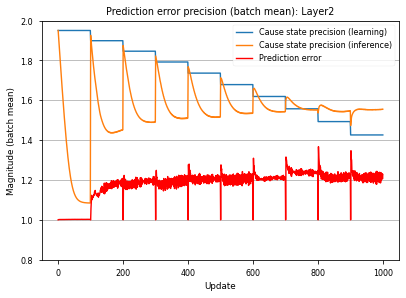

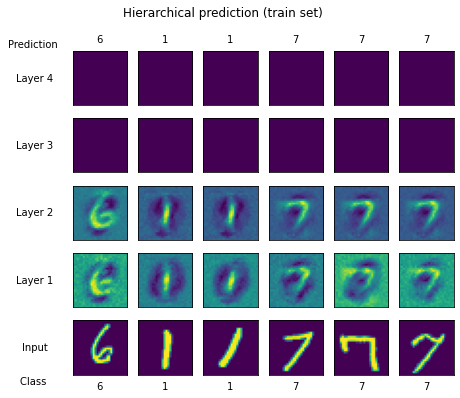

Layers: [Sequential(
  (0): Identity()
  (1): Linear(in_features=512, out_features=784, bias=False)
  (2): Dropout(p=0.0, inplace=False)
), Sequential(
  (0): Identity()
  (1): Linear(in_features=20, out_features=256, bias=False)
  (2): Dropout(p=0.0, inplace=False)
)]
Cause states : [[64, 1, 784], [64, 1, 256], [64, 1, 10]]
Hidden states: [[64, 1, 784], [64, 1, 256], [64, 1, 10]]
Covariance learning: [[1, 1, 1], [1, 1, 1], [1]]
Covariance inference: [[64, 64, 64], [64, 64, 64], [1]]
Learning rates: [[0.001, 0.0, 0, 0.1, 0], [0.001, 0.001, 0, 0.1, 0]]
1 | 1 	 Update 300 | 300
Test accuracy: 76.5625


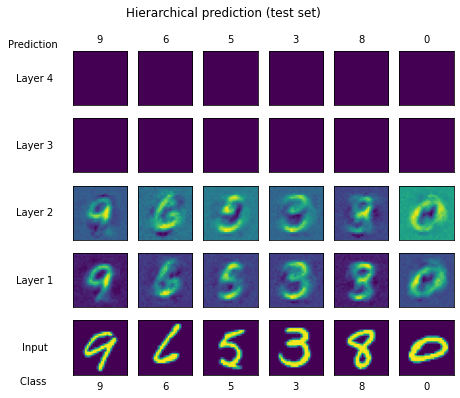

In [ ]:
%run generation.py

In [ ]:
# Train a static predictive coding model and classify MNIST digits

%%capture
%matplotlib inline
from pyGPC import *
from tools import *
from classification import *


Layers: [Sequential(
  (0): Identity()
  (1): Linear(in_features=128, out_features=10, bias=False)
  (2): Dropout(p=0.0, inplace=False)
), Sequential(
  (0): Identity()
  (1): Linear(in_features=1568, out_features=64, bias=False)
  (2): Dropout(p=0.0, inplace=False)
)]
Cause states : [[256, 1, 10], [256, 1, 64], [256, 1, 784]]
Hidden states: [[256, 1, 10], [256, 1, 64], [256, 1, 784]]
Batch: 1 | 10 	 Update: 100 | 100 	 Prior Acc: 12.1 	 Posterior Acc: 68.4 	 Best error: 2.313
Batch: 2 | 10 	 Update: 100 | 100 	 Prior Acc: 62.1 	 Posterior Acc: 78.5 	 Best error: 1.792
Batch: 3 | 10 	 Update: 100 | 100 	 Prior Acc: 63.3 	 Posterior Acc: 81.2 	 Best error: 1.491
Batch: 4 | 10 	 Update: 100 | 100 	 Prior Acc: 80.5 	 Posterior Acc: 84.8 	 Best error: 1.174
Batch: 5 | 10 	 Update: 100 | 100 	 Prior Acc: 75.4 	 Posterior Acc: 81.6 	 Best error: 1.105
Batch: 6 | 10 	 Update: 100 | 100 	 Prior Acc: 84.4 	 Posterior Acc: 86.3 	 Best error: 0.897
Batch: 7 | 10 	 Update: 100 | 100 	 Prior Acc: 7

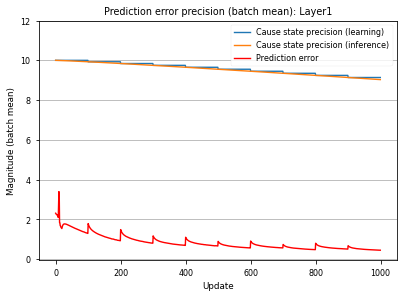

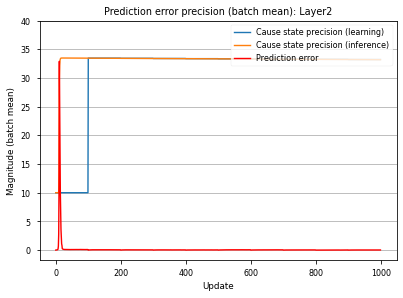

Layers: [Sequential(
  (0): Identity()
  (1): Linear(in_features=128, out_features=10, bias=False)
  (2): Dropout(p=0.0, inplace=False)
), Sequential(
  (0): Identity()
  (1): Linear(in_features=1568, out_features=64, bias=False)
  (2): Dropout(p=0.0, inplace=False)
)]
Cause states : [[1024, 1, 10], [1024, 1, 64], [1024, 1, 784]]
Hidden states: [[1024, 1, 10], [1024, 1, 64], [1024, 1, 784]]
Batch: 1 | 1 	 Update: 1 | 100 	 Prior Acc: 85.7 	 Posterior Acc: 85.7 	 Best error: 3.881
             Train Accuracy  Test Accuracy
2 layer PCN            85.5           85.7


In [ ]:
run()

In [ ]:
# Train a dynamical predictive coding model

# The default setting will train on a single batch of the moving MNIST dataset
# The default setting is pure inference (no weights learning)
# For pure inference, the results on the test set are independent of the train set
%%capture
from pyGPC import *
from tools import *
from GPC import *

for env_id, env_name in enumerate(['Mnist-Train-v0', 'Mnist-Test-v0']): 

    # create Moving MNIST gym environment
    env = gym.make(env_name); env.reset()

    # create model
    ch, ch2, ch3 = 64, 64, 128  # CNN channels
    PCN = Model([1 * 16 * 16, ch*8*8, ch*8*8, ch2*4*4, ch2*4*4, ch3*2*2, ch3*2*2, ch3*1*1, ch3*1*1, 64, 64, 4],  # state sizes
        ELU(), ELU(),  # hierarchical & dynamical activation
        lr_w=np.asarray([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]) * 0.000,  # 1,  # weights lr
        lr_sl=np.asarray([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) * 0,  # lower state lr
        lr_sh=np.asarray([1, 1, 1, 1, 1, 1, 1, 1, .1, .1, .1, .1]) * .1,  # higher state lr
        lr_g=np.asarray([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) * 1,  # state gain lr
        dim=[1, ch, ch, ch2, ch2, ch3, ch3, ch3, 1, 1, 1, 1],  # state channels (use 1 for dense layers)
        sr=[2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])  # sampling interval (skipped observations in lower layer)

    model_sizes_summary(PCN)

    for a_id, action in enumerate(ACTIONS):  # passive perception task (model has no control)
        if a_id % 20 == 0 and a_id < len(ACTIONS): # how much history to log and visualize
            [err_h, err_t, preds_h, preds_t, preds_g], inputs = [[[] for _ in PCN.layers] for _ in range(5)], [[]]
            precisions, raw_errors, variances_slow, datapoints, total_updates = [], [], None, [], 0

        # get observation and preprocess
        for i in range(int(PCN.sr[0])):  # skip observations according to data layer's sample rate
            obs, rew, done, _ = env.step([action for b in range(B_SIZE)])  # step environment
        input = (torch.Tensor(obs['agent_image'])).reshape([B_SIZE, -1, 64 ** 2]) / 25
        input = torch.nn.MaxPool2d(4, stride=4)(input.reshape([B_SIZE, -1, 64, 64]))  # reduce input size
        PCN.curr_cause[0] = torch.tensor(input.detach().float()).reshape([B_SIZE, 1, -1])  # feed to model
        PCN.c_curr_gain[0] = torch.ones_like(PCN.c_curr_gain[0])  # feed to model

        converged = False
        for update in range(UPDATES):
            total_updates += 1

            # update hierarchical layers
            for l_h in reversed(range(len(PCN.layers))):

                # freeze weights when testing
                if env_id == 1: PCN.freeze([3])

                # step hierarchical variables
                for i in range(1): # how often to update layers relative to each other
                    p_h, e_h = GPC(PCN, l=l_h)
                    GPC(PCN, l=l_h, infer_precision=True);  # update precision (precision inference)
                    if l_h == 0:
                        converged = e_h[0].mean(dim=0).mean().abs() < CONVERGENCE_TRESHOLD
                        precisions.append(np.diag(np.array(PCN.covar[0].mean(dim=0).detach())).mean())
                        raw_errors.append(e_h[0].mean(dim=0).detach().numpy().mean())

                # update dynamical layers
                for l_d in range(1, len(PCN.layers_d[l_h].layers), 1):
                    if DYNAMICAL:
                        p_d, e_t = GPC(PCN.layers_d[l_h], l=l_d, dynamical=True)  # step higher order dynamical variables
                        if update == UPDATES - 1: PCN.layers_d[l_h].last_cause[l_d] = PCN.layers_d[l_h].curr_cause[
                            l_d].clone().detach()  # memorize

                # visualization
                if (update == UPDATES - 1 and l_h == 0) or (converged and l_h == 0):
                    for d, i in zip([inputs[0], preds_h[l_h], err_h[l_h]], [input[:1], p_h[:1], e_h[:1].detach()]): d.append(i)  # hierarchical
                    if DYNAMICAL: preds_t[l_d].append(p_d[:1]), err_t[l_d].append(e_t[:1].detach())  # dynamical
                    #p_g = PCN.predict_mixed(target=PCN.state(-1)[0].detach()*PCN.state(-1)[1].detach())[0] # prediction from target state
                    #preds_g[l_h].append(p_g[0])
                    if a_id == len(ACTIONS) - 1 :  # visualize batch
                        for d, n in zip([input, p_h], ["input", "pred_h"]):
                            plot_batch(d, title=str(env_name) + n)

                # memorize states and precision
                if update == UPDATES - 1 or converged:
                    if l_h == 0: datapoints.append(total_updates)
                    PCN.last_cause[l_h] = PCN.curr_cause[l_h].clone().detach()  # memorize hierarchical state
                    if variances_slow is not None:
                        PCN.covar = variances_slow
                        PCN.covar_hidden = variances_slow_hidden
                    _, raw_error = GPC(PCN, l=l_h, infer_precision=True);  # precision per datapoint
                    variances_slow = [c.clone().detach() for c in PCN.covar]  # variance per datapoints (learning)
                    variances_slow_hidden = [c.clone().detach() for c in PCN.covar_hidden]  # variance per datapoints (learning)
            if converged: break
    env.close()





In [ ]:
""" Print summaries """
model_sizes_summary(PCN);
print_layer_variances(PCN,0);


Hierarchical weights: 
Layer 0: [ELU(alpha=1.0), ConvTranspose2d(128, 1, kernel_size=(2, 2), stride=(2, 2), bias=False), Dropout(p=0.0, inplace=False)]
Layer 1: [ELU(alpha=1.0), ConvTranspose2d(128, 64, kernel_size=(2, 2), stride=(2, 2), bias=False), Dropout(p=0.0, inplace=False)]
Layer 2: [ELU(alpha=1.0), ConvTranspose2d(256, 64, kernel_size=(2, 2), stride=(2, 2), bias=False), Dropout(p=0.0, inplace=False)]
Layer 3: [ELU(alpha=1.0), ConvTranspose2d(256, 128, kernel_size=(2, 2), stride=(2, 2), bias=False), Dropout(p=0.0, inplace=False)]
Layer 4: [ELU(alpha=1.0), Linear(in_features=128, out_features=128, bias=False), Dropout(p=0.0, inplace=False)]
Layer 5: [ELU(alpha=1.0), Linear(in_features=8, out_features=64, bias=False), Dropout(p=0.0, inplace=False)]

Dynamical weights: 
Layer 0: [Sequential(
  (0): ELU(alpha=1.0)
  (1): Linear(in_features=256, out_features=256, bias=False)
)]
Layer 1: [Sequential(
  (0): ELU(alpha=1.0)
  (1): Linear(in_features=8192, out_features=4096, bias=False)

100%|██████████| 21/21 [00:00<00:00, 2437.94it/s]


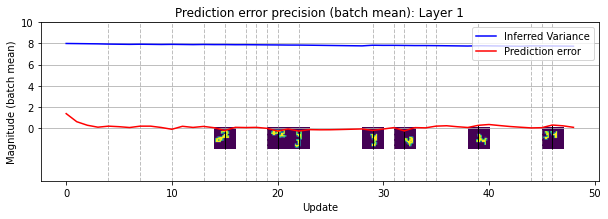

In [ ]:
""" Visualize updates and surprising images at high error peaks (absolute error > 0.1)"""
generate_videos(preds_h, inputs, inputs, err_h, env_name, nr_videos=3, scale=25);
plot_thumbnails(precisions, errors=raw_errors, inputs=inputs, datapoints=datapoints, threshold=0.2, img_s=2);

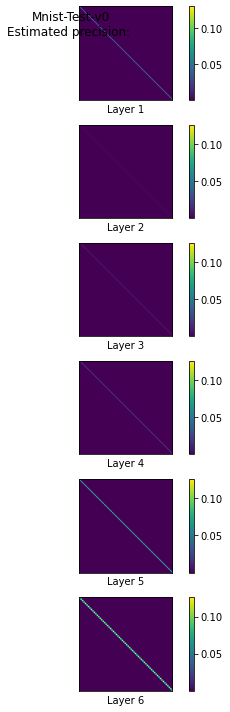

In [ ]:
""" Visualize inferred precision"""
visualize_covariance_matrix(PCN, title=env_name, skip_l=1);

In [ ]:
# Moving MNIST train and test predictions
# Run this cell twice if videos don't show 

from IPython.display import Image, display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

try:
  # Train set
  print("TRAIN DATA")
  Image(open('./figures/insMnist-Train-v0.gif','rb').read())
  print("Inputs\n")
  Image(open('./figures/p_hMnist-Train-v0.gif','rb').read())
  print("Prediction from states in all layers\n")
  Image(open('./figures/p_gMnist-Train-v0.gif','rb').read())
  print("Prediction from state in deepest layer\n")

  # Test set
  print("\n\nTEST DATA")
  Image(open('./figures/insMnist-Test-v0.gif','rb').read())
  print("Inputs\n")
  Image(open('./figures/p_hMnist-Test-v0.gif','rb').read())
  print("Prediction from states in all layers\n")
  Image(open('./figures/p_gMnist-Test-v0.gif','rb').read())
  print("Prediction from state in deepest layer\n")
except:
  pass

TRAIN DATA


Inputs



Prediction from states in all layers



Prediction from state in deepest layer



TEST DATA


Inputs



Prediction from states in all layers



Prediction from state in deepest layer



TRAIN DATA


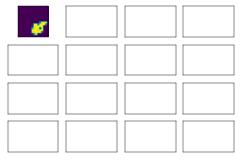

Input 



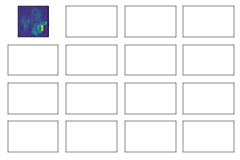

Prediction from states in all layers



TEST DATA


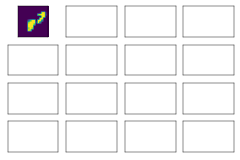

Input 



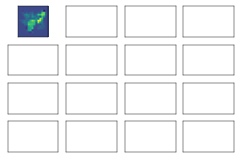

Prediction from states in all layers



In [ ]:
# Visualize batch of inputs and predictions
# We use the last frame of the sequence, since it is the most refined estimation

try:
  print("TRAIN DATA")
  Image(open('./figures/Mnist-Train-v0input.png','rb').read())
  print("Input \n")
  Image(open('./figures/Mnist-Train-v0pred_h.png','rb').read())
  print("Prediction from states in all layers\n")
  Image(open('./figures/Mnist-Train-v0pred_g.png','rb').read())
  print("Prediction from state in deepest layer\n")

  print("\n\nTEST DATA")
  Image(open('./figures/Mnist-Test-v0input.png','rb').read())
  print("Input \n")
  Image(open('./figures/Mnist-Test-v0pred_h.png','rb').read())
  print("Prediction from states in all layers\n")
  Image(open('./figures/Mnist-Test-v0pred_g.png','rb').read())
  print("Prediction from state in deepest layer\n")
except:
  pass

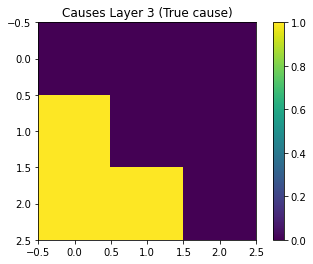

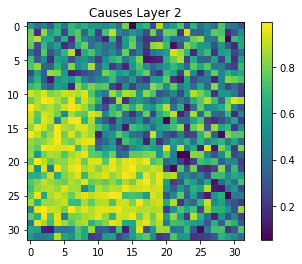

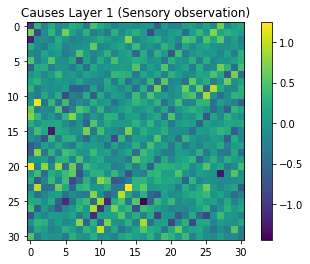

In [ ]:
"""
Second order perception in the visual domain

Here, visual content is defined via second order statistics, i.e. without first-order perceptual content.
Recognizing second-order objects requires top-down prediction of precision.
This renders second order perception a suitable task to contrast GPC with other architectures.

This script generates data comparable to pubmed.ncbi.nlm.nih.gov/25823866 with
convolutional neural networks as the generative model.
Gaussian noise enters the data generating process via parameter initialization.

Second order perception requires the estimated precision to be dependent on hidden states
in higher layers, so that objects and their precision are predicted jointly.

"""

import torch
import matplotlib.pyplot as plt
from torch import nn

# Layer 3 causes: Position of object
input = torch.zeros([1,1,3,3])
input[:,:,2,1] = 1
input[:,:,2,0] = 1
input[:,:,1,0] = 1

# Layer 2 causes: Position of object in sensory space
m = nn.ConvTranspose2d(1, 10, (10, 10), stride=10, padding=(0, 0), output_padding=(2, 2), bias=None)
torch.nn.init.ones_(m.weight);
output = m(input).mean(dim=1).unsqueeze(1)
output = torch.sigmoid(output*2+(torch.randn_like(output))) # add innovation

# Layer 1 causes (observable): Object in sensory space
m = nn.Conv2d(1, 10, (2, 2), stride=1, bias=False, padding_mode="reflect")
torch.nn.init.normal_(m.weight, 0, 1);
output2 = m((output*torch.randn_like(output))).mean(dim=1).unsqueeze(1);
output2 = output2;

plt.imshow(input.detach().numpy().reshape(input.shape[-1],input.shape[-1]));
plt.colorbar();
plt.title("Causes Layer 3 (True cause)");
plt.show();

plt.imshow(output.detach().numpy().reshape(output.shape[-1],output.shape[-1]));
plt.colorbar();
plt.title("Causes Layer 2");
plt.show();

plt.imshow(output2.detach().numpy().reshape(output2.shape[-1],output2.shape[-1]));
plt.colorbar();
plt.title("Causes Layer 1 (Sensory observation)");
plt.show();


In [ ]:
# A bias for inference?

# Comparing gradient based predictive coding with and without activity gain optimization:
# 1) with activity gain : output =  weights(activity * activity_gain) + weights_bias
# 2) without activity gain : output = weights(activity) + weights_bias
# Activity gain = Modulatory (multiplicative) bias on activity

# Experiment:
#     - Pure inference (no weights optimization)
#     - randomly initialised ( N(0,1) ) activity
#     - optimize activity such that projection through weights fits another randomly initialised ( N(0,1) ) tensor

# Evaluation:
#     - updates up to convergence (loss <= 0.01)


import torch, numpy as np

UPDATES = 1000 # maximum allowed updates
length = np.array([0,0]) # store final results

for optimize_gain in [0,1]:
    for i in range(10):
        d = torch.randn(64).requires_grad_()  # activity
        b = torch.randn(64).requires_grad_()  # activity gain (multiplicative bias)
        w = torch.nn.Linear(64, 16, False)  # weights (optionally with additive bias)
        t = torch.randn(16)  # target
        opt_d = torch.optim.SGD([d], 0.1)  # activity optimizer
        opt_b = torch.optim.SGD([b], 0.1)  # activity gain optimizer

        for i in range(UPDATES):
            opt_d.zero_grad()

            if optimize_gain == 0:
                loss = torch.mean(((w(d)) - t) ** 2) # no multiplicative bias on activity
            else:
                loss = torch.mean(((w(d*b)) - t) ** 2)

            loss.backward()

            opt_d.step() # step activity
            if optimize_gain == 1: opt_b.step()  # step activity gain

            if loss <= 0.01 or i == (UPDATES-1):
                length[optimize_gain] += i
                break

length = length/10
print("Average updates to convergence without activity gain: ", length[0])
print("Average updates to convergence with activity gain: ", length[1])

Average updates to convergence without activity gain:  884.8
Average updates to convergence with activity gain:  290.7


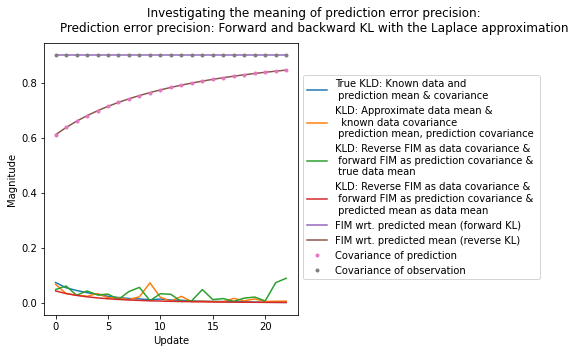

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import *
from torch.autograd import grad
from torch.distributions import *
from torch.distributions.multivariate_normal import MultivariateNormal

"""
Can we compute the full KLD instead of the ELBO under the Laplace assumption?

Laplace approximation:
- Approximate a posterior distribution with a Gaussian centered at the maximum a posteriori (MAP) estimate
- Replaces the problem of integrating a function with the problem of maximizing it, i.e. an optimization problem
- The covariance of the Gaussian is determined by the Hessian matrix of log f(θ) at the maximum point (Mackay, 1998)

KL Divergence:
- forward KLD(p,q) --> mode averaging (--> Variational Inference..)
- backward KLD(p,q) --> mode fitting (--> Expectation propagation..)

Motivation: The prediction error precision in PCNs already measures 
all relevant quantities for both divergences.

In the context of predictive coding, we use the Laplace assumption in order to 
compute the full predictive and data distribution (which normally is untractable).

The FIM can be obtained A) analytically, as the Hessian of the prediction error (loss) function.
Or it can be estimated B) empirically from first order information (= empricial FIM = prediction error precision). 

We compare three settings for the analytical FIM:

1) No Laplace assumption: 
KL divergence with know mean and covariance of data and prediction
2) Laplace assumption for predictive distribution: 
      Same setting as 1) but the prediction covariance is obtained with 
      the Fisher Information Metric (FIM) (= Hessian of forward KL)
3) Laplace assumption for predictive and data distribution: 
      Same setting as 2) but both prediction and data covariances 
      are obtained with the FIM (= Hessian of forward and backward KL)
    
"""

# Motivation:
# Empirically, the prediction error precision seems to measure forward and backward FIM already
# when either the input or the prediction is fixed/ignored

# Hypothesis: PC precision allows to compute full KL loss instead of ELB0
# Using 1) the Laplace approximation, 2) approximated data mean (= precision weighted prediction mean)
# and  3) forward and reverse KL loss (= precision weighted MSE)
# we can encode data mean, covar and prediction covar as functions of the prediction mean
# (Variational Inference <-> Expectation Propagation ?..)

# create data
x = torch.ones([50])
loss = torch.nn.MSELoss()
data_mean = torch.tensor([0.3]).float() # unknown to the model (will be approximated as the mean of iterated prediction)
data_covar = torch.eye(1).float() * 0.9 # unknown to the model (will be approximated as the reverse KL FIM under the Laplace approximation)
true_data = MultivariateNormal(data_mean, data_covar)

# priors on model parameters
mean = torch.tensor([0.5]).float().requires_grad_() # known to the model
covar = (torch.eye(1).float() * .5).requires_grad_() # known to the model (will be approximated as the forward KL FIM under the Laplace approximation)
FIM_mean = (torch.eye(1).float() * 1).requires_grad_() # prior on FIM
estimated_data_mean = 0

# optimizers
opt_mean = torch.optim.SGD([mean], 0.1)
opt_covar = torch.optim.SGD([covar], 0.1)

# logging
errors, true_errors, FIM_errors, FIM_errors_approx_mean = [], [], [], []
true_FIM_mean_l, true_FIM_covar_l, true_FIM_mean_data_l = [], [], []
est_FIM_mean_l, est_FIM_covar_l = [], []
covars_data, covars = [], []
true_errors_exact = []

# experiment settings
optimize = True
nr_samples = 50


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
for i in x:
    # sample observation and prediction
    opt_mean.zero_grad(), opt_covar.zero_grad()
    pred = MultivariateNormal(mean, covar)

    # simplification: compute estimated data mean via MSE instead of KL ( = precision weighted MSE)
    # so that prediction errors are computed wrt. an approximate data mean
    # (in a predictive coding network, this is just the mean state estimate, when optimized towards minimizing PE from the outgoing prediction)
    for sample in range(nr_samples):
        estimated_data_mean += true_data.sample()
    estimated_data_mean = estimated_data_mean / nr_samples
    data = MultivariateNormal(estimated_data_mean, data_covar)

    # Analytical covariance without Laplace assumption:
    # Model maintains mean and covariance explicitely
    # Problem: Requires known data and prediction covariance
    true_KL_error = kl_divergence(pred, data)
    true_KL_error_data = kl_divergence(data, pred)
    true_KL_error_exact = kl_divergence(true_data, pred)

    if optimize: # optimize prediction
        true_KL_error.backward()
        opt_mean.step()
        opt_covar.step()
        true_errors.append(true_KL_error.detach()) # logging
        true_errors_exact.append(true_KL_error_exact.detach())
    else: # compute exact FIM
        # Forward FIM: compute Hessian of forward KL loss wrt. predicted mean
        grad11 = grad(true_KL_error, mean, create_graph=True)  # first derivative
        grad21 = grad(grad11[0][0], mean, create_graph=True)  # second derivative
        FIM_mean = grad21[0].detach()**-1
        FIM_mean = FIM_mean.unsqueeze(-1).requires_grad_() # prepare FIM for optimization as prediction covariance
        pred_FIM = MultivariateNormal(mean, FIM_mean) # the prediction distribution with known FIM as covariance

        # logging
        covars.append(pred.covariance_matrix.detach().numpy()[0, 0])
        covars_data.append(data.covariance_matrix.detach().numpy()[0, 0])
        true_FIM_mean_l.append(FIM_mean.detach())

        # Reverse FIM: compute Hessian of reverse KL loss wrt. predicted mean
        grad11 = grad(true_KL_error_data, mean, create_graph=True)  # first derivative
        grad21 = grad(grad11[0][0], mean, create_graph=True)  # second derivative
        FIM_mean_data = grad21[0].detach()**-1
        FIM_mean_data = FIM_mean_data.unsqueeze(-1).detach() # prepare the known FIM to replace the unknown data covariance in the loss

        # encode data distribution with reverse FIM as covariance and approximated mean (from bottom-up prediction error)
        data_FIM = MultivariateNormal(estimated_data_mean, FIM_mean_data) # the data distribution with known FIM as covariance
        true_FIM_mean_data_l.append(FIM_mean_data.detach())
        FIM_errors.append(kl_divergence(pred_FIM, data_FIM).detach())

        # encode data distribution with reverse FIM as covariance and predicted mean (from top-down predicted mean)
        data_FIM_approx_mean = MultivariateNormal(mean, FIM_mean_data)
        FIM_errors_approx_mean.append(kl_divergence(pred_FIM, data_FIM_approx_mean).detach())

    optimize = not optimize  # switch between optimizing the model and measuring the FIM

ax1.plot(true_errors_exact[2:], label="True KLD: Known data and \n prediction mean & covariance")
ax1.plot(true_errors[2:], label="KLD: Approximate data mean &  \n  "
                                "known data covariance \n prediction mean, "
                                "prediction covariance")
ax1.plot(FIM_errors[2:], label="KLD: Reverse FIM as data covariance & \n "
                               "forward FIM as prediction covariance & \n "
                               "true data mean")
ax1.plot(FIM_errors_approx_mean[2:], label="KLD: Reverse FIM as data covariance & \n "
                               "forward FIM as prediction covariance & \n "
                               "predicted mean as data mean")
ax1.plot(true_FIM_mean_l[2:], label="FIM wrt. predicted mean (forward KL)")
ax1.plot(true_FIM_mean_data_l[2:], label="FIM wrt. predicted mean (reverse KL)")
ax1.plot(covars[2:], '.', label="Covariance of prediction")
ax1.plot(covars_data[2:], '.', label="Covariance of observation")
ax1.set_ylabel("Magnitude")
ax1.set_xlabel("Update")
ax1.legend(bbox_to_anchor=(1.0, 0.9), bbox_transform=ax1.transAxes)
ax2.set_visible(False)
plt.suptitle("Investigating the meaning of prediction error precision:\nPrediction error precision: Forward and backward KL with the Laplace approximation")
plt.show()
plt.close()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)


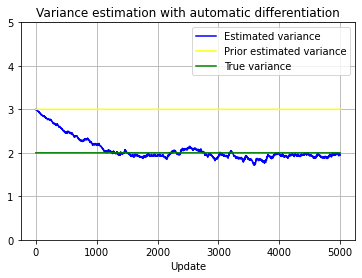

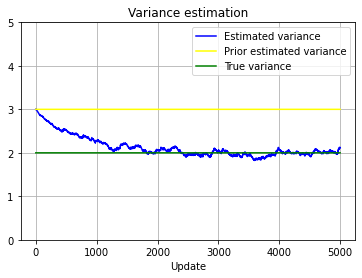

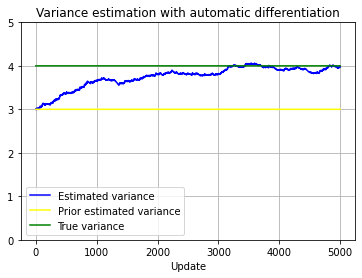

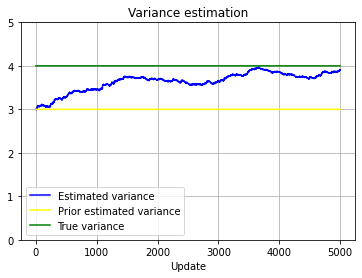

In [ ]:
""" Precision estimation and Variance decay rate

Replicates E5 in Bogacz, Rafal. "A tutorial on the free-energy framework for modelling perception and learning."
Journal of mathematical psychology 76 (2017): 198-211. with automatic differentation
"""

import math, random, matplotlib.pyplot as plt
import numpy as np
import torch

# We use a simplified predictive coding layer where only input noise needs to be measured
# in comparison to a fixed top-down prediction to be coherent with Bogacz 2017.
# Without this fixed prediction assumption, the estimated precision measures 
# a mixture of input (~ inferred activity) and prediction (~ predicted activity) noise.

UPDATES = 5000 # number of weight updates
LRATE_sigma = .01  # learning rate for prediction error variance

for sigma_phi in [2,4]: # variance of current activity (observed)
    for AUTODIFF in [True, False]:
        mean_phi = 5 # observed current activity
        phi_above = torch.ones(1)*5 # top-down predicted activity
        sigma = torch.ones(1).requires_grad_()*3 # prior on learned prediction error variance
        target_mean = [np.ones(1)*2.5] # observed target
        avg_sigma, plt_sigma, sigma_prior = [], [sigma.detach().numpy()[0]], sigma # plotting

        for trial in range(1,UPDATES,1):
            target = torch.Tensor(target_mean).detach()
            phi = random.normalvariate(mean_phi, math.sqrt(sigma_phi)) # observed noisy activity

            # Update estimated variance
            if AUTODIFF:
                sigma = sigma.detach()
                optimizer_sigma = torch.optim.SGD([sigma], lr=LRATE_sigma)
                optimizer_sigma.zero_grad()
                sigma = sigma.requires_grad_()
                err = sigma**-1 * torch.square_(phi_above-phi)  # precision weighted prediction error
                err.backward()
                optimizer_sigma.step()
                sigma = sigma - LRATE_sigma * sigma**-1 # variance decay. otherwise, only variances higher than the prior can be estimated
            else:
                err = sigma**-1 * torch.abs((phi - phi_above))  # precision weighted prediction error
                dFdS_p = (err * torch.transpose(err, 0,0) - sigma**-1) # change of prediction error variance
                sigma = sigma + LRATE_sigma * dFdS_p # learned prediction error variance

            plt_sigma.append(sigma.detach().numpy()[0])

        # Plot
        avg_sigma.append(np.asarray(plt_sigma).reshape([UPDATES,1]))
        avg_sigma = np.mean(np.asarray(avg_sigma), axis=0).astype(np.float32)
        true_variance = np.ones_like(avg_sigma) * sigma_phi
        variance_prior = np.ones_like(avg_sigma) * sigma_prior.detach().numpy()
        autodiff_str = " with automatic differentiation" if AUTODIFF else ""
        plt.title('Variance estimation'+str(autodiff_str))
        plt.plot(avg_sigma, label="Estimated variance", color="blue")
        plt.plot(variance_prior, label="Prior estimated variance", color="yellow")
        plt.plot(true_variance, label="True variance", color="green")
        plt.legend(); plt.grid(); plt.ylim(0,5)
        plt.xlabel("Update")
        plt.show()

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([xs, ys, zs, np.ones_like(xs)])


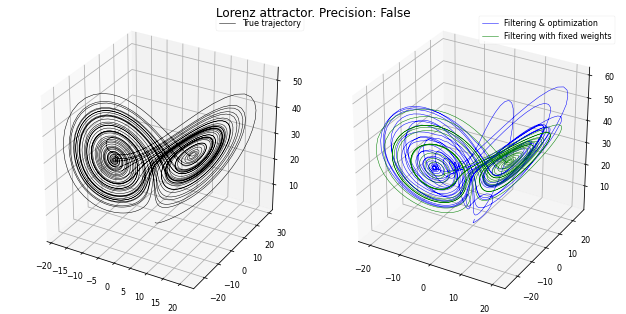

True x:	 -2.548
Pred x:	 -2.503

True y:	 -0.783
Pred y:	 -0.663

True z:	 23.72
Pred z:	 23.704


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([xs, ys, zs, np.ones_like(xs)])


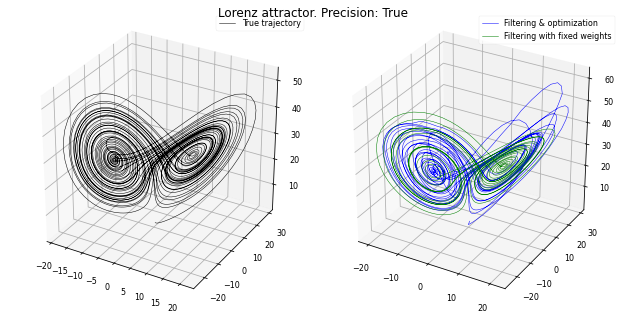

True x:	 -2.548
Pred x:	 -2.487

True y:	 -0.783
Pred y:	 -0.682

True z:	 23.72
Pred z:	 23.569


In [2]:
import torch
import matplotlib.pyplot as plt
plt.style.use(['seaborn-paper'])
import numpy as np

""" 
Minimal example for dynamical weights optimisation: 
- estimating the dynamics of a Lorenz attractor
- top-down parameters (= cause states = Prandtl number, Rayleigh number, etc.) are known, 
- weights parameterizing x_dot, y_dot, z_dot (hidden states motion) have to be estimated
- single layer PCN without incoming or outgoing prediction, hidden state are set equal to the sensory observation
- precision is estimated on the dynamical prediction error
See https://matplotlib.org/stable/gallery/mplot3d/lorenz_attractor.html for the ground truth attractor
"""

dt = 0.01
scale = 1  # changes start position
s,r,b = 10, 28, 2.667
num_steps = 5000
plt_range = 2000
start_interpolation = num_steps-plt_range

for USE_PRECISION in [False, True]:
    LR_PRECISION = 0.001

    def lorenz(x, y, z, s=10, r=28, b=2.667):
        x_dot = s*(y - x) # s*y - s*x
        y_dot = r*x - y - x*z
        z_dot = x*y - b*z
        return x_dot, y_dot, z_dot

    def optimize_PCN(x, y, z, true_x, true_y, true_z, s=10, r=28, b=2.667, optimize=True):
        """ Optimize dynamical prediction """
        global datapoint; global sigma
        x = torch.tensor(x).float(); y = torch.tensor(y).float(); z = torch.tensor(z).float()
        v = torch.tensor([[s, r, b]]).detach()  # cause state (not optimised)
        x_past = torch.tensor([[x, y, z]]).detach()  # past hidden state (not optimised)
        x = torch.tensor([[true_x, true_y, true_z]]).detach()  # current hidden state (optimised)
        opt = torch.optim.SGD([net_dynamical.weight], lr=.0000001)
        opt_sigma = torch.optim.SGD([sigma], lr=LR_PRECISION)
        opt.zero_grad()
        opt_sigma.zero_grad()
        pred = net_dynamical(torch.cat([v.detach(), x_past.detach()], -1)) * x_past.detach()
        if optimize:
            err = (x[0] - pred[0]).abs().sum()
            error = err * sigma.requires_grad_()**-1 * err
            if USE_PRECISION:
                error.backward()
            else:
                err.backward()
            opt.step()
            opt_sigma.step()
            if (sigma - LR_PRECISION * sigma**-1).detach() >= 1: # define maximum allowed precision
                sigma = (sigma - LR_PRECISION * sigma**-1).detach()  # cause state variance decay
            #print("i", i, "error ", err.detach().numpy().round(3), "sigma", sigma.detach().numpy().round(3))
        return pred[0][0].detach(), pred[0][1].detach(), pred[0][2].detach()

    # set up model logging
    m_xs = torch.empty(num_steps + 1)
    m_ys = torch.empty(num_steps + 1)
    m_zs = torch.empty(num_steps + 1)
    m_xs[0], m_ys[0], m_zs[0] = (0.*scale, 1.*scale, 1.05*scale)

    # set up true attractor
    xs = np.empty(num_steps + 1)
    ys = np.empty(num_steps + 1)
    zs = np.empty(num_steps + 1)
    xs[0], ys[0], zs[0] = (0.*scale, 1.*scale, 1.05*scale)

    # set up weights
    net_dynamical = torch.nn.Linear(6, 3, bias=False)
    torch.nn.init.constant_(net_dynamical.weight, 0.001)
    sigma = (torch.ones([1]) * 10).requires_grad_()
    datapoint = 0

    for i in range(num_steps):
        """ step true attractor """
        x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
        xs[i+1] = xs[i] + (x_dot * dt)
        ys[i+1] = ys[i] + (y_dot * dt)
        zs[i+1] = zs[i] + (z_dot * dt)

        """ step model """
        if i < start_interpolation:
            m_x_dot, m_y_dot, m_z_dot = optimize_PCN(xs[i], ys[i], zs[i], xs[i + 1], ys[i + 1], zs[i + 1], optimize=True)
        else:
            m_x_dot, m_y_dot, m_z_dot = optimize_PCN(xs[i], ys[i], zs[i], xs[i + 1], ys[i + 1], zs[i + 1], optimize=False)
        m_xs[i+1] = m_x_dot
        m_ys[i+1] = m_y_dot
        m_zs[i+1] = m_z_dot

    hist = 3
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.plot(xs[-plt_range*hist:], ys[-plt_range*hist:], zs[-plt_range*hist:], lw=0.5, color='black', label="True trajectory")
    ax1.legend()
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.plot(m_xs[-plt_range*hist:-plt_range], m_ys[-plt_range*hist:-plt_range], m_zs[-plt_range*hist:-plt_range], lw=0.5, color='blue', label="Filtering & optimization")
    ax2.plot(m_xs[-plt_range-1:], m_ys[-plt_range-1:], m_zs[-plt_range-1:], lw=0.5, color='green', label="Filtering with fixed weights")
    ax2.legend()
    fig.suptitle("Lorenz attractor. Precision: "+str(USE_PRECISION))
    plt.tight_layout()
    plt.savefig("./lorenz_attractor"+str(USE_PRECISION)+".png", dpi=150)
    plt.show()
    plt.close()

    print("True x:\t", xs[-1].round(3))
    print("Pred x:\t", m_x_dot.detach().numpy().round(3))
    print("\nTrue y:\t", ys[-1].round(3))
    print("Pred y:\t", m_y_dot.detach().numpy().round(3))
    print("\nTrue z:\t", zs[-1].round(3))
    print("Pred z:\t", m_z_dot.detach().numpy().round(3))